In [2]:
import os
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
import pandas as pd
import seaborn as sns
import matplotlib.image as img
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline
print("=================== Packages Loaded ===================")

C:\Users\moham\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


=================== Packages Loaded ===================


=================== Loading Data ===================
Image 1 : Ragu 	 2:Carbonara 	 3:Lasagna 	 4:gnocchi


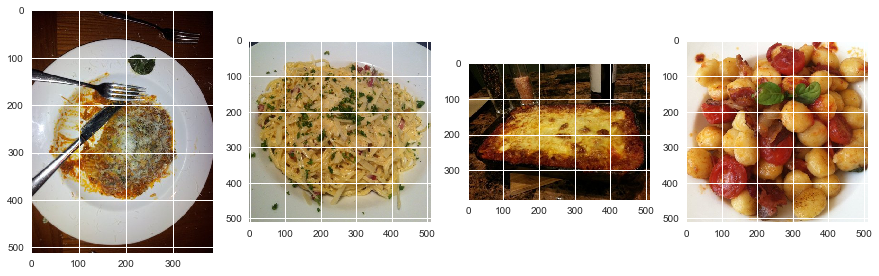

In [3]:
print("=================== Loading Data ===================")
root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'
gnocchi_dir = 'gnocchi/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))
all_gnocchi = os.listdir(os.path.join(root_dir, gnocchi_dir))

print("Image 1 : Ragu \t 2:Carbonara \t 3:Lasagna \t 4:gnocchi")
fig, ax = plt.subplots(1,4, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_carbonara)
img = plt.imread(os.path.join(root_dir, carbonara_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_lasagna)
img = plt.imread(os.path.join(root_dir, lasagna_dir, rand_img))
ax[2].imshow(img)

rand_img = np.random.choice(all_gnocchi)
img = plt.imread(os.path.join(root_dir, gnocchi_dir, rand_img))
ax[3].imshow(img)

plt.show()

In [4]:
print("=================== Transforming images to Matrices ===================")
import matplotlib.image as img

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)
print("=================== Raggu Loaded ===================")

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)
print("=================== Carbonara Loaded ===================")

for img_name in all_lasagna:
    img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(2)
print("=================== Lasagna Loaded ===================")

for img_name in all_gnocchi:
    img_arr = img.imread(os.path.join(root_dir,gnocchi_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(3)
print("=================== Gnnochi Loaded ===================")

=================== Transforming images to Matrices ===================
=================== Raggu Loaded ===================
=================== Carbonara Loaded ===================
=================== Lasagna Loaded ===================
=================== Gnnochi Loaded ===================


In [11]:
print("=================== Defining Test and Train Values ===================")
print("=================== Split of 70:30 ===================")
X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=4)
#Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Test Set :",len(x_test))

=================== Defining Test and Train Values ===================
=================== Split of 70:30 ===================
For Main Data Set : 3999
For Train Set : 2799
For Test Set : 1200


In [6]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (2799, 12675) (2799,)
Testing data shape :  (1200, 12675) (1200,)


In [7]:
X.shape

(3999, 65, 65, 3)

In [16]:
classes = np.unique(all_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


In [17]:
Y=all_labels

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print("For Main Data Set :",len(all_imgs))
print("For Train Set :",len(x_train))
print("For Val Set :",len(x_val))
print("For Test Set :",len(x_test))

For Main Data Set : 3999
For Train Set : 2239
For Val Set : 560
For Test Set : 1200


In [54]:
x_train.shape

(2239, 65, 65, 3)

In [55]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
val_Y_one_hot = to_categorical(y_val)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0.]


In [56]:
x_train.shape, x_test.shape

((2239, 65, 65, 3), (1200, 65, 65, 3))

In [57]:
train_Y_one_hot.shape

(2239, 4)

In [58]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 64
epochs = 20
num_classes = 4
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(65,65,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 65, 65, 32)        896       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 65, 65, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 17, 17, 128)       73856     
__________

In [59]:
fashion_train = fashion_model.fit(x_train, train_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, val_Y_one_hot))

Train on 2239 samples, validate on 560 samples
Epoch 1/20
2239/2239 [==============================] - 34s 15ms/step - loss: 1.3928 - acc: 0.3399 - val_loss: 1.3068 - val_acc: 0.4071
Epoch 2/20
2239/2239 [==============================] - 29s 13ms/step - loss: 1.2252 - acc: 0.4372 - val_loss: 1.3112 - val_acc: 0.4196
Epoch 3/20
2239/2239 [==============================] - 29s 13ms/step - loss: 1.1687 - acc: 0.4730 - val_loss: 1.1755 - val_acc: 0.4839
Epoch 4/20
2239/2239 [==============================] - 34s 15ms/step - loss: 1.0899 - acc: 0.5221 - val_loss: 1.1421 - val_acc: 0.5161
Epoch 5/20
2239/2239 [==============================] - 31s 14ms/step - loss: 1.0139 - acc: 0.5770 - val_loss: 1.0683 - val_acc: 0.5429
Epoch 6/20
2239/2239 [==============================] - 30s 13ms/step - loss: 0.9323 - acc: 0.6195 - val_loss: 1.1058 - val_acc: 0.5179
Epoch 7/20
2239/2239 [==============================] - 30s 13ms/step - loss: 0.8541 - acc: 0.6561 - val_loss: 1.1358 - val_acc: 0.5304
E

In [61]:
test_eval = fashion_model.evaluate(x_test, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.2226337973276773
Test accuracy: 0.5733333333333334


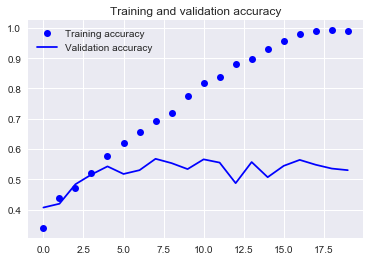

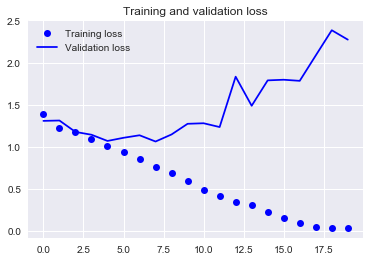

In [62]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [63]:
batch_size = 34
epochs = 25
num_classes = 4

In [64]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(65,65,3)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 65, 65, 32)        896       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 65, 65, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 64)        18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
__________

In [65]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [67]:
fashion_train_dropout = fashion_model.fit(x_train, train_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, val_Y_one_hot))

Train on 2239 samples, validate on 560 samples
Epoch 1/25
2239/2239 [==============================] - 38s 17ms/step - loss: 1.4215 - acc: 0.2604 - val_loss: 1.3633 - val_acc: 0.2929
Epoch 2/25
2239/2239 [==============================] - 37s 17ms/step - loss: 1.2946 - acc: 0.3787 - val_loss: 1.3121 - val_acc: 0.3554
Epoch 3/25
2239/2239 [==============================] - 36s 16ms/step - loss: 1.2265 - acc: 0.4350 - val_loss: 1.2268 - val_acc: 0.4411
Epoch 4/25
2239/2239 [==============================] - 34s 15ms/step - loss: 1.1852 - acc: 0.4774 - val_loss: 1.2093 - val_acc: 0.4518
Epoch 5/25
2239/2239 [==============================] - 33s 15ms/step - loss: 1.1716 - acc: 0.4757 - val_loss: 1.2254 - val_acc: 0.4464
Epoch 6/25
2239/2239 [==============================] - 37s 17ms/step - loss: 1.1198 - acc: 0.5150 - val_loss: 1.1743 - val_acc: 0.4607
Epoch 7/25
2239/2239 [==============================] - 36s 16ms/step - loss: 1.0759 - acc: 0.5418 - val_loss: 1.1618 - val_acc: 0.5143
E

In [68]:
fashion_model.save("fashion_model_dropout.h5py")

In [70]:
test_eval = fashion_model.evaluate(x_test, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

1200/1200 [==============================] - 5s 4ms/step
Test loss: 1.6146595017115275
Test accuracy: 0.6


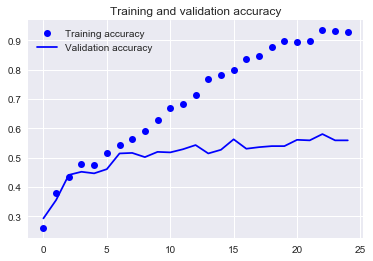

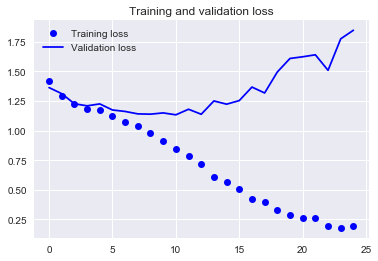

In [71]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [78]:
predicted_classes = fashion_model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
print( "Found %d correct labels" % len(correct))

Found 715 correct labels


In [79]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))

Found 485 incorrect labels


In [80]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.59      0.63      0.61       314
    Class 1       0.58      0.75      0.66       304
    Class 2       0.61      0.48      0.54       296
    Class 3       0.61      0.51      0.56       286

avg / total       0.60      0.60      0.59      1200



### Here essentially I am running multiple SVM's for classification to find optimal c Value
> Lower C value leads to more flexiblity and leads to higher training error
>
> Higher C value leads to less flexibility and leads to lower training error

Acc Train: 0.960700, Acc Test:0.705833
Acc Train: 1.000000, Acc Test:0.653333
Acc Train: 1.000000, Acc Test:0.653333


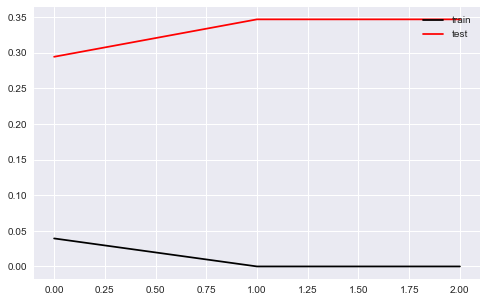

In [19]:
C_values = [0.001,1.0,10.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

### Performing cross validation and checking which combination of svm with a different kernel gives awesome results

In [24]:
start_time = time.time()
models = (
          svm.SVC(kernel='rbf', C=0.001),
          svm.SVC(kernel='rbf', gamma=10, C=0.001),
          svm.SVC(kernel='sigmoid', C=0.001, gamma=0.1),
          svm.SVC(kernel='poly', degree=2, gamma=0.5, C=0.001))

X_train_s, X_val, Y_train_s, Y_val = train_test_split(x_train, y_train, test_size=0.3)

for idx,model in enumerate(models):
    model.fit(X_train_s,Y_train_s)
    tr_error = 1-model.score(X_train_s,Y_train_s)
    val_error = 1-model.score(X_val,Y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

Model:0, Train Error:0.244513, Val Error:0.258333, Test Error:0.253333
Model:1, Train Error:0.244513, Val Error:0.258333, Test Error:0.253333
Model:2, Train Error:0.244513, Val Error:0.258333, Test Error:0.253333
Model:3, Train Error:0.000000, Val Error:0.275000, Test Error:0.281667
Duration: --- 11.833705373605092 Minutes ---


| Model Number | Train prediction |	Validation Prediction |	Test Prediction |
| ------------ | ---------------- | --------------------- | --------------- |
|0|	0.75855|	0.734524|	0.74667|
|1|	0.75855|	0.734524|	0.74667|
|2|	0.75855|	0.734524|	0.74667|
|3|	1|	        0.686905|	0.7325|

### Transforming data into HOG Format
Will work on Hog Error later

In [42]:
features = extract_features(X,[hog_features, color_histogram_hsv]) 
scaler = StandardScaler()
X = scaler.fit_transform(features)

x_hog_train, x_hog_test, y_hog_train, y_hog_test = train_test_split(X, Y, test_size=0.2, random_state=42)

(3999, 65, 65, 3)


TypeError: slice indices must be integers or None or have an __index__ method

### Running SVM on HOG data based on the winner model from above

In [43]:
clf = svm.SVC(kernel='rbf', C=0.001) 
clf.fit(x_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
start_time = time.time()

model=clf
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True       0.0  1.0
Predicted          
0.0        896  304
1.0          0    0
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.85       896
        1.0       0.00      0.00      0.00       304

avg / total       0.56      0.75      0.64      1200

0.7466666666666667
Duration: --- 1.4199337323506673 Minutes ---


In [ ]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("Cohen Kappa Score: "+str(cohen_kappa_score(y_test,pred)))

# Enough with SVMS Moving to ANN